In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
GeoAxes._pcolormesh_patched = Axes.pcolormesh
# fname = '/home/cccr/msingh/phd_obj2_data/ensemble_data/Admin2.shp'
# adm1_shapes = list(shapereader.Reader(fname).geometries())
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_june_to_nov_aer.nc'
ds_anthrop = xr.open_dataset(data_dir)

data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_june_to_nov_noaer.nc'
ds_no_anthrop = xr.open_dataset(data_dir)

# ds_anthrop    = ds_anthrop.assign_coords(lon=(((ds_anthrop.lon) % 360) - 180)).sortby('lon')
# ds_no_anthrop = ds_no_anthrop.assign_coords(lon=(((ds_no_anthrop.lon) % 360) - 180)).sortby('lon')

pr_diff = (ds_anthrop.pr - ds_no_anthrop.pr)*86400
mrso_diff = (ds_anthrop.mrsos - ds_no_anthrop.mrsos)
u_diff = ds_anthrop.uas - ds_no_anthrop.uas
v_diff = ds_anthrop.vas - ds_no_anthrop.vas

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


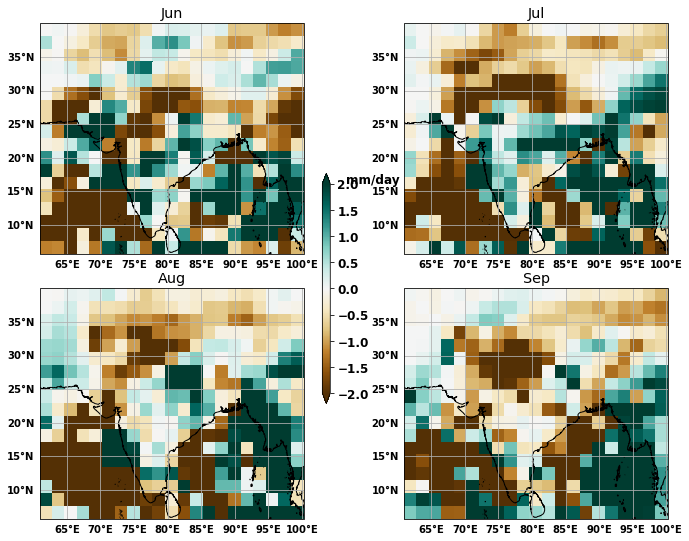

In [8]:
size_w, size_h = 0.4, 0.4
gap = 0.06
fig = plt.figure(figsize=(11,8))
ax3 = fig.add_axes([0.15,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax4 = fig.add_axes([0.15+size_w+gap,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax1 = fig.add_axes([0.15,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.15+size_w+gap,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())

ax_ = [ax1, ax2, ax3, ax4]
tit_ = ['Jun', 'Jul', 'Aug', 'Sep']
for i in range(4):
    pr_diff_ = (ds_anthrop.pr.isel(time=i) - ds_no_anthrop.pr.isel(time=i))*86400
    im = pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(cmap='BrBG',ax=ax_[i], vmin=-2, vmax=2, extend='both',add_colorbar=False)
    #im = pr_diff.plot(cmap='bwr_r',ax=ax_[i], vmin=-5, vmax=5, extend='both',add_colorbar=False)
    ax_[i].coastlines(resolution='10m')
    ax_[i].set_title(tit_[i], size='x-large')
    gl = ax_[i].gridlines()
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 'medium'}
    gl.ylabel_style = {'size': 'medium'}

#fig.suptitle('[Anthrop(#30 mem) - NoAnthrop(#30 mem)] Precipitation')
cbar_ax = fig.add_axes([0.54, 0.3, 0.01, 0.4])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.set_ylabel('mm/day', size='large', weight='bold', position=(30,1), rotation=0)
cb.ax.tick_params(labelsize='large')
#plt.savefig('test.png')

In [9]:
# import glob
# data_dir = '/home/cccr/msingh/phd_data_cmip_account/experiments_anthrop_2xsmc/data/'
# filenames_a = glob.glob(data_dir+'/atm_mon_2002????000000.nc')

# ens_list = []
# for file in filenames_a:
#     ds = xr.open_dataset(file).smsoil.sum(dim='lev4')
#     ens_list.append(ds.sel(time=ds.time.dt.month.isin([6, 7, 8, 9])))
# ds_anthrop_2xsm = xr.concat(ens_list, dim='time').groupby('time.month').mean(dim='time')

# pr_diff = (ds_anthrop_2xsm - ds_anthrop.groupby('time.month').mean(dim='time').smsoil.sum(dim='lev4'))#*86400
# u_diff = ds_anthrop.uas - ds_no_anthrop.uas
# v_diff = ds_anthrop.vas - ds_no_anthrop.vas

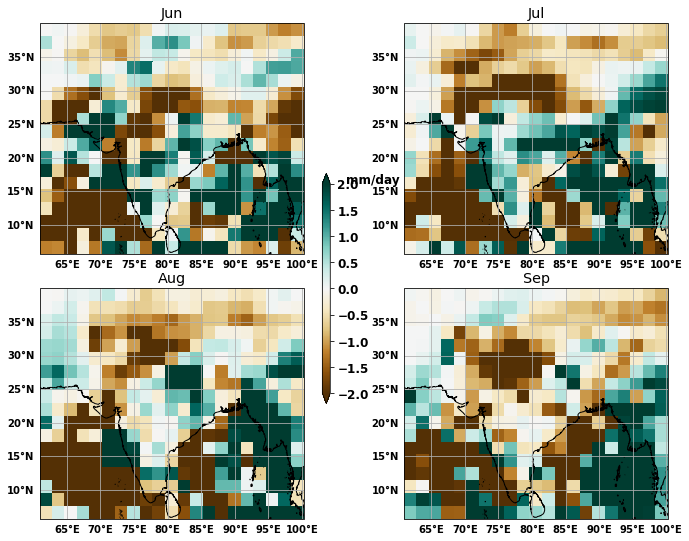

In [10]:
size_w, size_h = 0.4, 0.4
gap = 0.06
fig = plt.figure(figsize=(11,8))
ax3 = fig.add_axes([0.15,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax4 = fig.add_axes([0.15+size_w+gap,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax1 = fig.add_axes([0.15,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.15+size_w+gap,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())

ax_ = [ax1, ax2, ax3, ax4]
tit_ = ['Jun', 'Jul', 'Aug', 'Sep']
for i in range(4):
    #pr_diff_ = (ds_anthrop.pr.isel(time=i) - ds_no_anthrop.pr.isel(time=i))*86400
    pr_diff_ = pr_diff[i]
    im = pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(cmap='BrBG',ax=ax_[i], vmin=-2, vmax=2, extend='both',add_colorbar=False)
    #im = pr_diff.plot(cmap='bwr_r',ax=ax_[i], vmin=-5, vmax=5, extend='both',add_colorbar=False)
    ax_[i].coastlines(resolution='10m')
    ax_[i].set_title(tit_[i], size='x-large')
    gl = ax_[i].gridlines()
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 'medium'}
    gl.ylabel_style = {'size': 'medium'}

#fig.suptitle('[Anthrop(#30 mem) - NoAnthrop(#30 mem)] Precipitation')
cbar_ax = fig.add_axes([0.54, 0.3, 0.01, 0.4])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.set_ylabel('mm/day', size='large', weight='bold', position=(30,1), rotation=0)
cb.ax.tick_params(labelsize='large')
#plt.savefig('test.png')

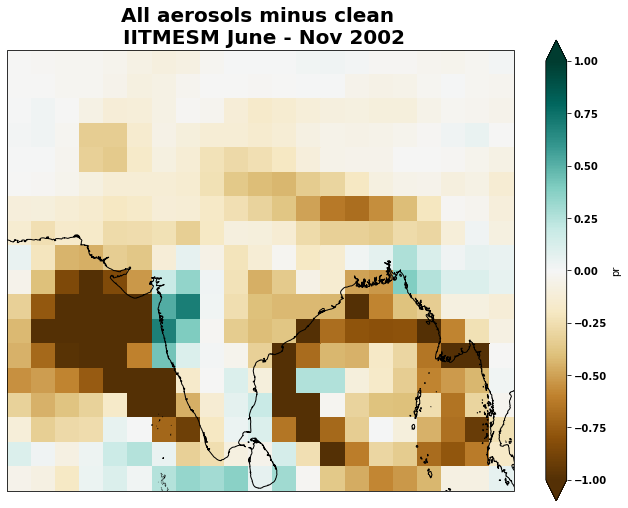

In [16]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

pr_diff.sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='BrBG', vmin=-1, vmax=1, extend='both')

ax1.coastlines(resolution='10m')
plt.title('All aerosols minus clean \n IITMESM June - Nov 2002', fontsize=20, weight='bold')
plt.savefig('all_aer_minus_clean_june_nov2002.png', dpi=500)

Text(0.5, 1.0, 'pr and winds at 850 hpa (Aero - NoAero)')

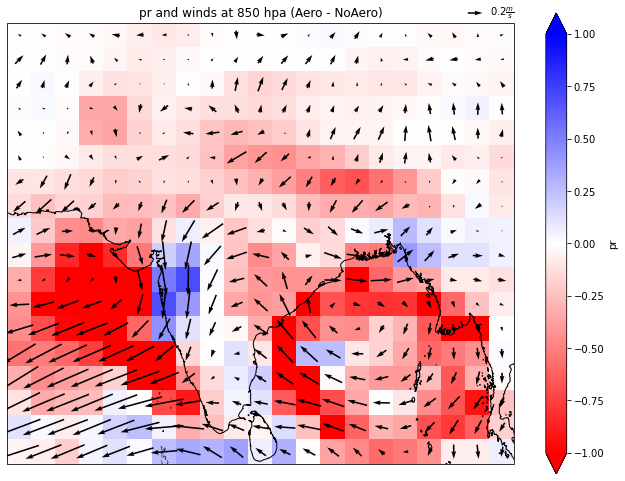

In [7]:
data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_plev_jjas_ensmean.nc'
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_day_plev_aer.nc'
ds_anthrop_ = xr.open_dataset(data_dir)

data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_plev_jjas_ensmean.nc'
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_day_plev_noaer.nc'
ds_no_anthrop_ = xr.open_dataset(data_dir)

ds_diff = ds_anthrop_ - ds_no_anthrop_

lat = ds_anthrop_.ua.sel(lon=slice(60,100), lat=slice(40,5)).sel(level=850).lat.values
lon = ds_anthrop_.ua.sel(lon=slice(60,100), lat=slice(40,5)).sel(level=850).lon.values
u   = ds_diff.ua.sel(lon=slice(60,100), lat=slice(40,5)).sel(level=850).mean(dim='time').values
v   = ds_diff.va.sel(lon=slice(60,100), lat=slice(40,5)).sel(level=850).mean(dim='time').values

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

pr_diff.sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r', vmin=-1, vmax=1, extend='both')

ax1.coastlines(resolution='10m')

Q = ax1.quiver(lon, lat, u, v, pivot='middle')
qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("pr and winds at 850 hpa (Aero - NoAero)")

Text(0.5, 1.0, 'Vertical vel at 850 hpa (Anthrop - No Anthrop)2002 ')

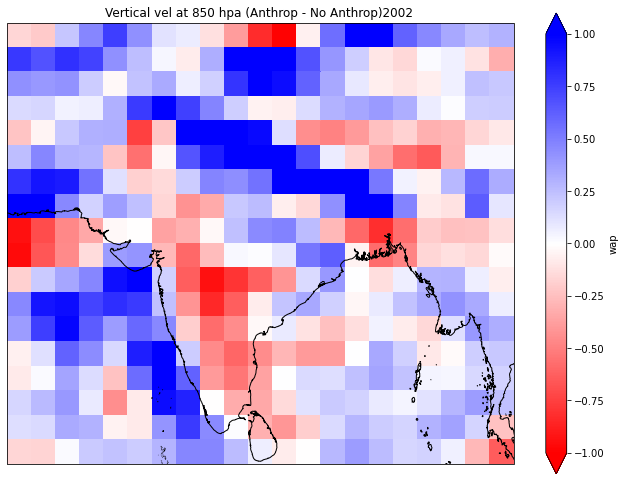

In [8]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.wap*1e5
ds_wap.sel(level=850).sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("Vertical vel at 850 hpa (Anthrop - No Anthrop)2002 ")

Text(0.5, 1.0, 'Vertical vel at 500 hpa (Anthrop - No Anthrop) 2002 ')

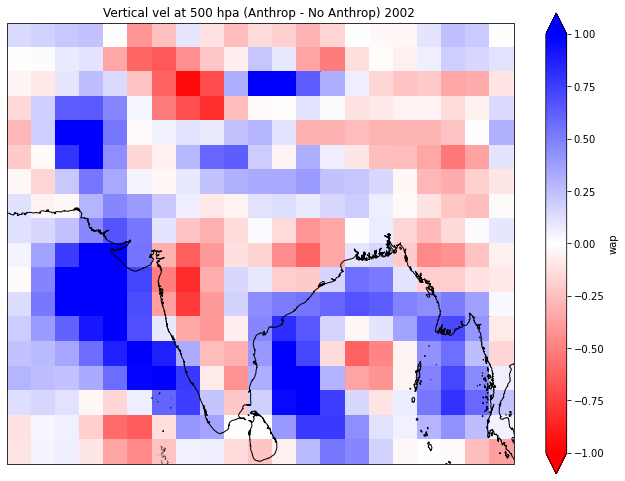

In [9]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.wap*1e5
ds_wap.sel(level=500).sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("Vertical vel at 500 hpa (Anthrop - No Anthrop) 2002 ")

Text(0.5, 1.0, 'Vertical vel at 200 hpa (Anthrop - No Anthrop) 2002 ')

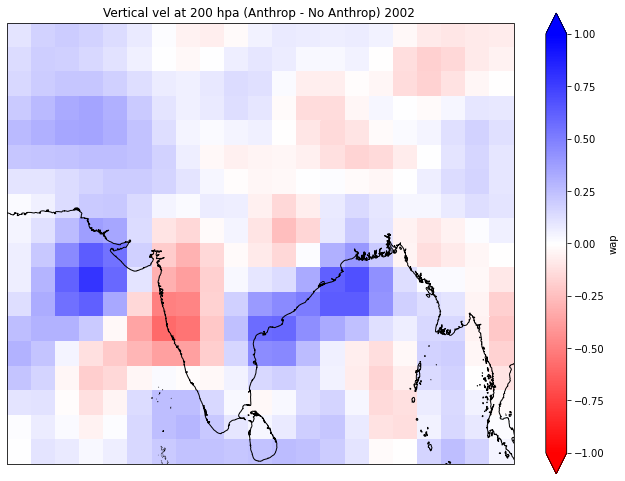

In [10]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.wap*1e5
ds_wap.sel(level=200).sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("Vertical vel at 200 hpa (Anthrop - No Anthrop) 2002 ")

Text(0.5, 1.0, 'u wind at 850 hpa (Anthrop - No Anthrop) 2002 ')

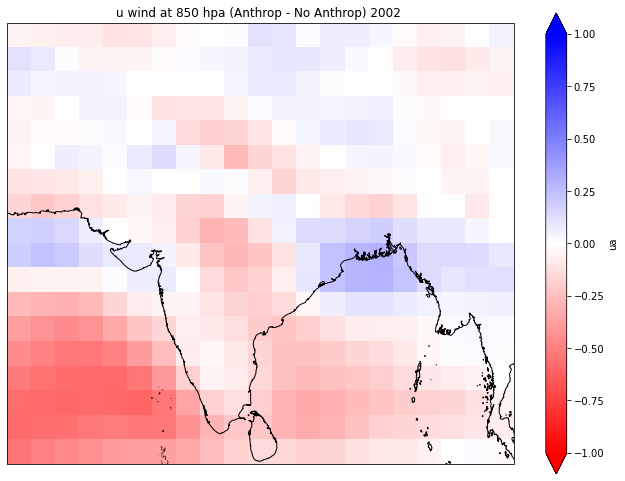

In [11]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.ua
ds_wap.sel(level=850).sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("u wind at 850 hpa (Anthrop - No Anthrop) 2002 ")

Text(0.5, 1.0, 'u wind at 500 hpa (Anthrop - No Anthrop) 2002 ')

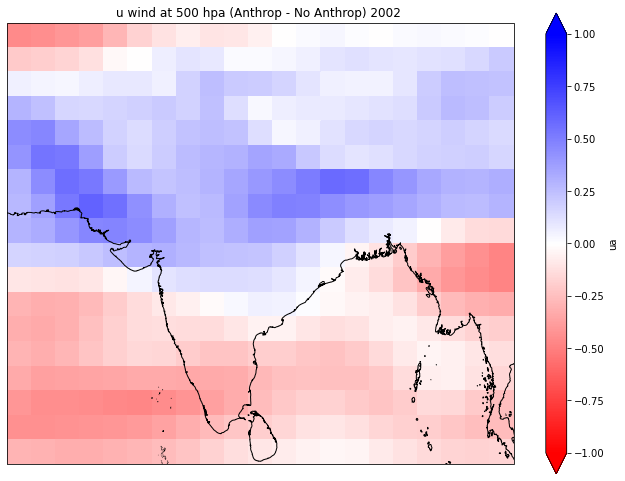

In [12]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.ua
ds_wap.sel(level=500).sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("u wind at 500 hpa (Anthrop - No Anthrop) 2002 ")

Text(0.5, 1.0, 'u wind at 200 hpa (Anthrop - No Anthrop) 2002 ')

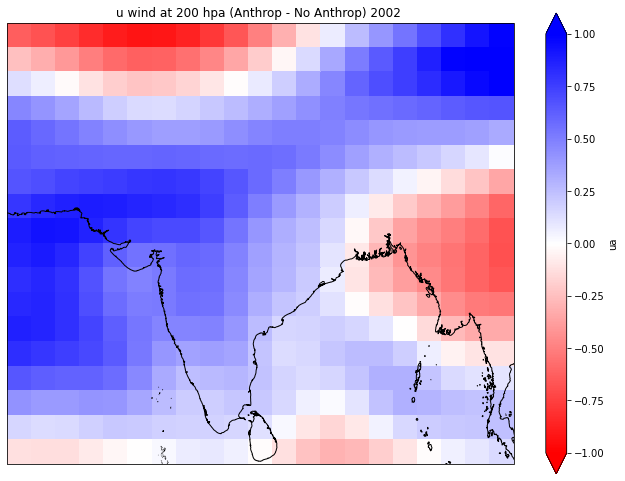

In [13]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.ua
ds_wap.sel(level=200).sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='bwr_r',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("u wind at 200 hpa (Anthrop - No Anthrop) 2002 ")

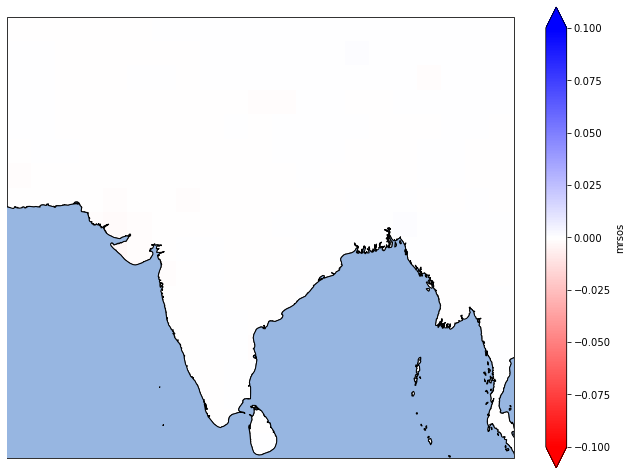

In [14]:
import cartopy as cart
fig = plt.figure(figsize=(11,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())

diff_ev = ds_anthrop.mrsos - ds_no_anthrop.mrsos
diff_ev.mean(dim='time').sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax, \
                                            vmin=-0.1,vmax=0.1,extend='both', cmap='bwr_r')
ax.coastlines(resolution='10m')
ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')

AttributeError: 'Dataset' object has no attribute 'evspsbl'

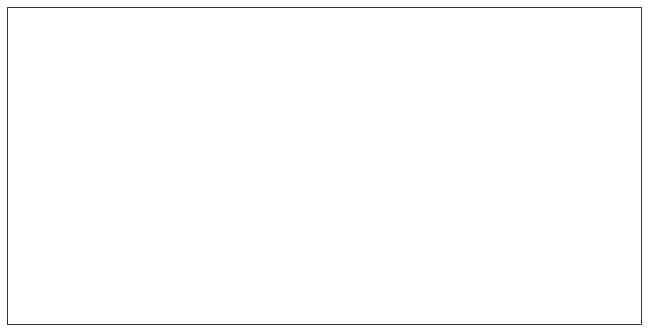

In [15]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())

diff_ev = ds_anthrop.evspsbl - ds_no_anthrop.evspsbl
diff_ev = diff_ev*86400
diff_ev.mean(dim='time').sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax,\
                                                                              extend='both', cmap='twilight_shifted')
ax.coastlines(resolution='10m')
plt.title('Total evaporation Anthrop - No Anthrop (2002)')

In [ ]:
# data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_anthrop = xr.open_dataset(data_dir)

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_no_anthrop = xr.open_dataset(data_dir)

# ds_anthrop    = ds_anthrop.assign_coords(lon=(((ds_anthrop.lon) % 360) - 180)).sortby('lon')
# ds_no_anthrop = ds_no_anthrop.assign_coords(lon=(((ds_no_anthrop.lon) % 360) - 180)).sortby('lon')

ds_diff = ds_anthrop - ds_no_anthrop

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.15,0.1, 0.8,0.8],projection=ccrs.PlateCarree())

ds_wap = ds_diff.tas
ds_wap.sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax1, cmap='twilight_shifted',\
                                                                                   vmin=-1,vmax=1,extend='both')

ax1.coastlines(resolution='10m')

# Q = ax1.quiver(lon, lat, u, v, pivot='middle')
# qk = ax1.quiverkey(Q, 0.75, 0.9, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.title("surface temperature (Anthrop - No Anthrop) 2002 ")

In [ ]:
# data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_anthrop = xr.open_dataset(data_dir)

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_no_anthrop = xr.open_dataset(data_dir)

fig = plt.figure(figsize=(11,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())

diff_ev = ds_anthrop.hpbl - ds_no_anthrop.hpbl
#diff_ev.mean(dim='time').sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax)
diff_ev.isel(time=1).sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax)
ax.coastlines(resolution='10m')
plt.title('Boundary layer height Anthrop - NoAnthrop 2002')

In [ ]:
# data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_anthrop = xr.open_dataset(data_dir)

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_no_anthrop = xr.open_dataset(data_dir)

anthrop_toa = ds_anthrop.rsdt - ds_anthrop.rsut
no_anthrop_toa = ds_no_anthrop.rsdt - ds_no_anthrop.rsut

anthrop_sf = ds_anthrop.rsdscs - ds_anthrop.rsuscs + ds_anthrop.rldscs - ds_anthrop.rluscs - ds_anthrop.hfls - ds_anthrop.hfss
no_anthrop_sf = ds_no_anthrop.rsdscs - ds_no_anthrop.rsuscs  + ds_no_anthrop.rldscs - ds_no_anthrop.rluscs- ds_no_anthrop.hfls - ds_no_anthrop.hfss

diff_rad_sf = anthrop_sf - no_anthrop_sf
fig = plt.figure(figsize=(11,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())

#diff_ev = ds_anthrop.hpbl - ds_no_anthrop.hpbl
diff_rad_sf.mean(dim='time').sel(lat=slice(40,5)).sel(lon=slice(60,100)).plot(ax=ax, cmap='RdBu_r',\
                                                                             vmin=-10, vmax=10, extend='both')
ax.coastlines(resolution='10m')
plt.title('Clear sky Net surface rad Anthrop - NoAnthrop 2002')

In [ ]:
# data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_anthrop = xr.open_dataset(data_dir)

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_no_anthrop = xr.open_dataset(data_dir)

anthrop_toa = ds_anthrop.rsdt - ds_anthrop.rsut
no_anthrop_toa = ds_no_anthrop.rsdt - ds_no_anthrop.rsut


diff_rad_toa = anthrop_toa - no_anthrop_toa
fig = plt.figure(figsize=(11,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],projection=ccrs.PlateCarree())

#diff_ev = ds_anthrop.hpbl - ds_no_anthrop.hpbl
diff_rad_toa.mean(dim='time').sel(lat=slice(40,5)).sel(lon=slice(60,100)).plot(ax=ax, cmap='RdBu_r',\
                                                                             vmin=-10, vmax=10, extend='both')
ax.coastlines(resolution='10m')
plt.title('Clear sky Net TOA rad Anthrop - NoAnthrop 2002')

In [ ]:
data_dir = '/home/cccr/msingh/data/IMD/imd-dly-p25-1901-2019_anom.nc'
ds_imd = xr.open_dataset(data_dir)#.isel(time=slice(5,9))

data_dir = '/home/cccr/msingh/data/TRMM_tropics_rainfall_daily_1998_2019/3b42v7_daily1998_2019_anom.nc'
ds_trmm = xr.open_dataset(data_dir)#.isel(time=slice(5,9))

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_anthrop = xr.open_dataset(data_dir)

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
# ds_no_anthrop = xr.open_dataset(data_dir)

In [ ]:

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_clim_mon_jjas_ensmean.nc'
# ds_anthrop_clim = xr.open_dataset(data_dir)

# data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_clim_mon_jjas_ensmean.nc'
# ds_no_anthrop_clim = xr.open_dataset(data_dir)

In [ ]:
size_w, size_h = 0.4, 0.4
gap = 0.06
fig = plt.figure(figsize=(11,8))
#ax3 = fig.add_axes([0.15,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax4 = fig.add_axes([0.15+size_w+gap-size_w/2,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax1 = fig.add_axes([0.15,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.15+size_w+gap,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())

ax_ = [ax1, ax2, ax3, ax4]
tit_ = ['IMD', 'TRMM', 'Anthrop', 'Anthrop - NoAnthrop']

ds_imd.sel(time=slice('2002-06-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).rf.isel(time=0).plot(ax=ax1, cmap='BrBG', vmin=-10, vmax=10, extend='both')
ds_trmm.sel(time=slice('2002-06-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).r.isel(time=0).sel(lon=slice(60,100), lat=slice(5,40)).plot(ax=ax2, cmap='BrBG', vmin=-10, vmax=10)
#ds_anthrop['pr_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5)).isel(time=0).plot(ax=ax3, cmap='BrBG', vmin=-10,vmax=10, extend='both')
#ds_no_anthrop['pr_no_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=-5,vmax=5, extend='both')
pr_diff_ = (ds_anthrop.pr.isel(time=0) - ds_no_anthrop.pr.isel(time=0))*86400
pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax4, cmap='BrBG', vmin=-2,vmax=2, extend='both')

#ds_no_anthrop['pr_no_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=-5,vmax=5, extend='both')

#pr_anthrop = ds_anthrop.pr*86400
#pr_anthrop.sel(lon=slice(66.5,100), lat=slice(38.5, 6.5)).mean(dim='time').plot(ax=ax3, cmap='BrBG', vmin=0, vmax=15)
#pr_no_anthrop = ds_no_anthrop.pr*86400
#pr_no_anthrop.sel(lon=slice(66.5,100), lat=slice(38.5, 6.5)).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=0, vmax=15)

for i in range(4):
    #pr_diff_ = (ds_anthrop.pr.isel(time=i) - ds_no_anthrop.pr.isel(time=i))*86400
    #im = pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(cmap='bwr_r',ax=ax_[i], vmin=-2, vmax=2, extend='both',add_colorbar=False)
    #im = pr_diff.plot(cmap='bwr_r',ax=ax_[i], vmin=-5, vmax=5, extend='both',add_colorbar=False)
    ax_[i].coastlines(resolution='10m')
    ax_[i].set_title(tit_[i], size='x-large')
    gl = ax_[i].gridlines()
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 'medium'}
    gl.ylabel_style = {'size': 'medium'}
fig.text(0.45,0.98,'June 2002 anomalies',fontsize=14)

In [ ]:
size_w, size_h = 0.4, 0.4
gap = 0.06
fig = plt.figure(figsize=(11,8))
#ax3 = fig.add_axes([0.15,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax4 = fig.add_axes([0.15+size_w+gap-size_w/2,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax1 = fig.add_axes([0.15,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.15+size_w+gap,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())

ax_ = [ax1, ax2, ax3, ax4]
tit_ = ['IMD', 'TRMM', 'Anthrop', 'Anthrop - NoAnthrop']

ds_imd.sel(time=slice('2002-06-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).rf.isel(time=1).plot(ax=ax1, cmap='BrBG', vmin=-10, vmax=10, extend='both')
ds_trmm.sel(time=slice('2002-06-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).r.isel(time=1).sel(lon=slice(60,100), lat=slice(5,40)).plot(ax=ax2, cmap='BrBG', vmin=-10, vmax=10)
#ds_anthrop['pr_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5)).isel(time=0).plot(ax=ax3, cmap='BrBG', vmin=-10,vmax=10, extend='both')
#ds_no_anthrop['pr_no_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=-5,vmax=5, extend='both')
pr_diff_ = (ds_anthrop.pr.isel(time=1) - ds_no_anthrop.pr.isel(time=1))*86400
pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax4, cmap='BrBG', vmin=-2,vmax=2, extend='both')

#ds_no_anthrop['pr_no_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=-5,vmax=5, extend='both')

#pr_anthrop = ds_anthrop.pr*86400
#pr_anthrop.sel(lon=slice(66.5,100), lat=slice(38.5, 6.5)).mean(dim='time').plot(ax=ax3, cmap='BrBG', vmin=0, vmax=15)
#pr_no_anthrop = ds_no_anthrop.pr*86400
#pr_no_anthrop.sel(lon=slice(66.5,100), lat=slice(38.5, 6.5)).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=0, vmax=15)

for i in range(4):
    #pr_diff_ = (ds_anthrop.pr.isel(time=i) - ds_no_anthrop.pr.isel(time=i))*86400
    #im = pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(cmap='bwr_r',ax=ax_[i], vmin=-2, vmax=2, extend='both',add_colorbar=False)
    #im = pr_diff.plot(cmap='bwr_r',ax=ax_[i], vmin=-5, vmax=5, extend='both',add_colorbar=False)
    ax_[i].coastlines(resolution='10m')
    ax_[i].set_title(tit_[i], size='x-large')
    gl = ax_[i].gridlines()
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 'medium'}
    gl.ylabel_style = {'size': 'medium'}
fig.text(0.45,0.98,'July 2002 anomalies',fontsize=14)

In [ ]:
size_w, size_h = 0.4, 0.4
gap = 0.06
fig = plt.figure(figsize=(11,8))
#ax3 = fig.add_axes([0.15,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax4 = fig.add_axes([0.15+size_w+gap-size_w/2,0.1,size_w,size_h],projection=ccrs.PlateCarree())
ax1 = fig.add_axes([0.15,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.15+size_w+gap,0.1+size_h+gap,size_w,size_h],projection=ccrs.PlateCarree())

ax_ = [ax1, ax2, ax3, ax4]
tit_ = ['IMD', 'TRMM', 'Anthrop', 'Anthrop - NoAnthrop']

ds_imd.sel(time=slice('2002-06-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).rf.mean(dim='time').plot(ax=ax1, cmap='BrBG', vmin=-10, vmax=10, extend='both')
ds_trmm.sel(time=slice('2002-06-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).r.mean(dim='time').sel(lon=slice(60,100), lat=slice(5,40)).plot(ax=ax2, cmap='BrBG', vmin=-10, vmax=10)
#ds_anthrop['pr_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5)).isel(time=0).plot(ax=ax3, cmap='BrBG', vmin=-10,vmax=10, extend='both')
#ds_no_anthrop['pr_no_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5)).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=-5,vmax=5, extend='both')
pr_diff_ = (ds_anthrop.pr.mean(dim='time') - ds_no_anthrop.pr.mean(dim='time'))*86400
pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax4, cmap='BrBG', vmin=-2,vmax=2, extend='both')

#ds_no_anthrop['pr_no_anthrop_anom'].sel(lon=slice(60,100), lat=slice(40,5).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=-5,vmax=5, extend='both')

#pr_anthrop = ds_anthrop.pr*86400
#pr_anthrop.sel(lon=slice(66.5,100), lat=slice(38.5, 6.5)).mean(dim='time').plot(ax=ax3, cmap='BrBG', vmin=0, vmax=15)
#pr_no_anthrop = ds_no_anthrop.pr*86400
#pr_no_anthrop.sel(lon=slice(66.5,100), lat=slice(38.5, 6.5)).mean(dim='time').plot(ax=ax4, cmap='BrBG', vmin=0, vmax=15)

for i in range(4):
    #pr_diff_ = (ds_anthrop.pr.isel(time=i) - ds_no_anthrop.pr.isel(time=i))*86400
    #im = pr_diff_.sel(lon=slice(60,100), lat=slice(40,5)).plot(cmap='bwr_r',ax=ax_[i], vmin=-2, vmax=2, extend='both',add_colorbar=False)
    #im = pr_diff.plot(cmap='bwr_r',ax=ax_[i], vmin=-5, vmax=5, extend='both',add_colorbar=False)
    ax_[i].coastlines(resolution='10m')
    ax_[i].set_title(tit_[i], size='x-large')
    gl = ax_[i].gridlines()
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 'medium'}
    gl.ylabel_style = {'size': 'medium'}
fig.text(0.45,0.98,'JJAS 2002 anomalies',fontsize=14)

In [2]:
data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
ds_anthrop = xr.open_dataset(data_dir)

data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
ds_no_anthrop = xr.open_dataset(data_dir)


data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_plev_jjas_ensmean.nc'
ds_anthrop_ = xr.open_dataset(data_dir)

data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_plev_jjas_ensmean.nc'
ds_no_anthrop_ = xr.open_dataset(data_dir)

ds_diff = ds_anthrop_ - ds_no_anthrop_

In [3]:
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_june_to_nov_aer.nc'
#data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_day_plev_aer.nc'
ds_anthrop_jun2nov = xr.open_dataset(data_dir)

data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_june_to_nov_noaer.nc'
#data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_day_plev_noaer.nc'
ds_no_anthrop_jun2nov = xr.open_dataset(data_dir)

#data_dir = '/home/cccr/msingh/phd_data_cmip_account/anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_day_plev_aer.nc'
ds_anthrop_jun2nov_ = xr.open_dataset(data_dir)

#data_dir = '/home/cccr/msingh/phd_data_cmip_account/no_anthrop/ATM/MON/atm_iitmesm_seasonal_hist_2002_mon_jjas_ensmean.nc'
data_dir = '/home/cccr/msingh/phd_data_cmip_account/aerosol_land_atmosphere_monsoon/data/atm_iitmesm_seasonal_hist_2002_day_plev_noaer.nc'
ds_no_anthrop_jun2nov_ = xr.open_dataset(data_dir)

ds_diff_jun2nov_ = ds_anthrop_jun2nov_ - ds_no_anthrop_jun2nov_

In [4]:
ds_aero_save = ds_anthrop_jun2nov.pr.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')*86400
ds_aero_save.to_netcdf('pr_aero_june_to_nov.nc')

ds_noaero_save = ds_no_anthrop_jun2nov.pr.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')*86400
ds_noaero_save.to_netcdf('pr_no_aero_june_to_nov.nc')

ds_aero_save = ds_anthrop_jun2nov.mrsos.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')*86400
ds_aero_save.to_netcdf('mrsos_aero_june_to_nov.nc')

ds_noaero_save = ds_no_anthrop_jun2nov.mrsos.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')*86400
ds_noaero_save.to_netcdf('mrsos_no_aero_june_to_nov.nc')

clear_sky_shortwave_rf_surface = (ds_anthrop_jun2nov.rsds - ds_anthrop_jun2nov.rsus).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
clear_sky_shortwave_rf_surface.to_netcdf('clear_sky_shortwave_rf_surface_aero_june_to_nov.nc')

clear_sky_shortwave_rf_surface = (ds_no_anthrop_jun2nov.rsds - ds_no_anthrop_jun2nov.rsus).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
clear_sky_shortwave_rf_surface.to_netcdf('clear_sky_shortwave_rf_surface_no_aero_june_to_nov.nc')

ds_aero_save = ds_anthrop_jun2nov.rlut.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
ds_aero_save.to_netcdf('olr_aero_june_to_nov.nc')

ds_noaero_save = ds_no_anthrop_jun2nov.rlut.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
ds_noaero_save.to_netcdf('olr_no_aero_june_to_nov.nc')

ds_aero_save = ds_anthrop_jun2nov.tas.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
ds_aero_save.to_netcdf('tas_aero_june_to_nov.nc')

ds_noaero_save = ds_no_anthrop_jun2nov.tas.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
ds_noaero_save.to_netcdf('tas_no_aero_june_to_nov.nc')

ds_aero_save = ds_anthrop_jun2nov.huss.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
ds_aero_save.to_netcdf('huss_aero_june_to_nov.nc')

ds_noaero_save = ds_no_anthrop_jun2nov.huss.sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='lat').mean(dim='lon')
ds_noaero_save.to_netcdf('huss_no_aero_june_to_nov.nc')

In [5]:
import matplotlib


NameError: name 'ds_trmm' is not defined

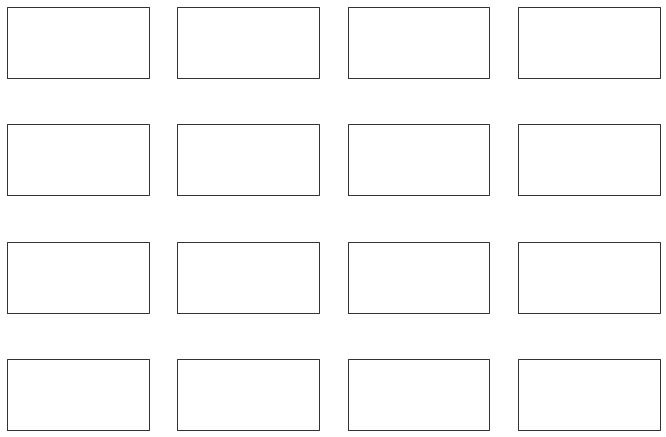

In [6]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

fig,ax = plt.subplots(ncols=4,nrows=4, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})

ds_trmm_ = [ds_trmm.sel(time=slice('2002-06-01T00:00:00.000000000','2002-06-30T00:00:00.000000000')).r.isel(time=1).sel(lon=slice(60,100), lat=slice(5,40)), \
     ds_trmm.sel(time=slice('2002-07-01T00:00:00.000000000','2002-07-30T00:00:00.000000000')).r.isel(time=1).sel(lon=slice(60,100), lat=slice(5,40)), \
     ds_trmm.sel(time=slice('2002-08-01T00:00:00.000000000','2002-08-30T00:00:00.000000000')).r.isel(time=1).sel(lon=slice(60,100), lat=slice(5,40)), \
     ds_trmm.sel(time=slice('2002-09-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).r.isel(time=1).sel(lon=slice(60,100), lat=slice(5,40))]

cnt = 0
for i in range(0,1):
    for j in range(4):
        ds_trmm_[cnt].plot(ax=ax[j,i], cmap='BrBG', vmin=-10, vmax=10, cbar_kwargs={'label': 'mm/day'})
        cnt=cnt+1
ds_imd_ = [ds_imd.sel(time=slice('2002-06-01T00:00:00.000000000','2002-06-30T00:00:00.000000000')).rf.mean(dim='time'), \
          ds_imd.sel(time=slice('2002-07-01T00:00:00.000000000','2002-07-30T00:00:00.000000000')).rf.mean(dim='time'), \
          ds_imd.sel(time=slice('2002-08-01T00:00:00.000000000','2002-08-30T00:00:00.000000000')).rf.mean(dim='time'), \
          ds_imd.sel(time=slice('2002-09-01T00:00:00.000000000','2002-09-30T00:00:00.000000000')).rf.mean(dim='time')]
for i in range(1,2):
    for j in range(4):
        ds_imd_[cnt-4].plot(ax=ax[j,i], cmap='BrBG', vmin=-10, vmax=10, cbar_kwargs={'label': 'mm/day'})
        cnt=cnt+1
for i in range(2,3)   :
    for j in range(4):
        ds_aod = ds_anthrop.aod.sum(dim='lev64').isel(time=j)
        im = ds_aod.sel(lon=slice(60,100),lat=slice(40,5)).plot(ax=ax[j,i], cmap='twilight_shifted',vmin=0.1,vmax=0.7, \
                                                               extend='both')
        ax[j,i].coastlines()
        ax[j,i].set_title('')
        
pr_diff_ = (ds_anthrop.pr - ds_no_anthrop.pr)*86400
for i in range(3,4):
    for j in range(4):
        pr_diff_.isel(time=j).sel(lon=slice(60,100), lat=slice(40,5)).plot(ax=ax[j,i], cmap='BrBG', vmin=-2,vmax=2, extend='both', cbar_kwargs={'label': 'mm/day'})
        u   = ds_diff.ua.sel(lon=slice(60,100), lat=slice(40,5)).isel(time=j).sel(level=slice(700,1000)).mean(dim='level')#.mean(dim='time')
        v   = ds_diff.va.sel(lon=slice(60,100), lat=slice(40,5)).isel(time=j).sel(level=slice(700,1000)).mean(dim='level')#.mean(dim='time')

        ds = u.to_dataset(name = 'uas')
        ds['vas'] = v

        Q = ds.plot.quiver('lon', 'lat', 'uas', 'vas', ax=ax[j,i], scale=10.0, linewidth=10, transform=ccrs.PlateCarree())
        #qk = ax[j,i].quiverkey(Q, 0.9, 0.8, 0.2, r'$2 \frac{m}{s}$', labelpos='E',
        #           coordinates='figure')
for i in range(4):
    for j in range(4):
        ax[j,i].set_title('')
        ax[j,i].coastlines()
#ax[0,0].set_title('TRMM Precipitation \n Anomaly', weight='bold')
# ax[0,1].set_title('IMD Precipitation \n Anomaly', weight='bold')
# ax[0,2].set_title('$\Delta$AOD 550nm \n (Anthrop-NoAnthrop)', weight='bold')
#ax[0,3].set_title('$\Delta$Precipitation \n (Anthrop-NoAnthrop)', weight='bold')
fig.tight_layout()
plt.savefig('precipitation_2002_response.png', dpi=500)

In [17]:
data_dir = '/home/cccr/msingh/phd_data_cmip_account/data_amip_iitmesm/anthrop_minus_no_anthrop_amip_clim.nc'
ds_amip = xr.open_dataset(data_dir)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


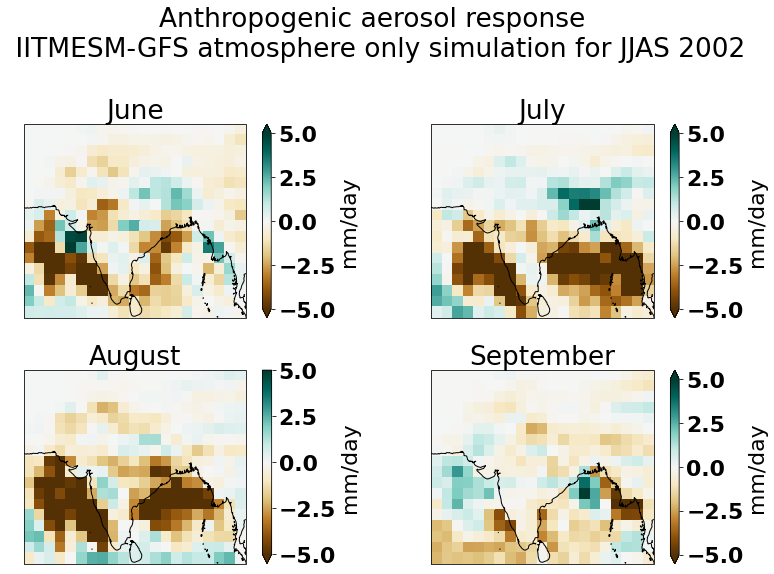

In [18]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})

cnt=  6
for i in range(0,2):
    for j in range(2):
        ds_  = ds_amip.pr.sel(lon=slice(60,100),lat=slice(40,5)).sel(month=cnt)*86400
        ds_.plot(ax=ax[i,j], cmap='BrBG', vmin=-5, vmax=5, cbar_kwargs={'label': 'mm/day'})
        cnt=cnt+1
cnt=0
tits_ = ['June', 'July', 'August', 'September']
for i in range(2):
    for j in range(2):
        ax[i,j].set_title(tits_[cnt])
        ax[i,j].coastlines()
        cnt=cnt+1
#ax[0,0].set_title('TRMM Precipitation \n Anomaly', weight='bold')
# ax[0,1].set_title('IMD Precipitation \n Anomaly', weight='bold')
# ax[0,2].set_title('$\Delta$AOD 550nm \n (Anthrop-NoAnthrop)', weight='bold')
#ax[0,3].set_title('$\Delta$Precipitation \n (Anthrop-NoAnthrop)', weight='bold')
fig.suptitle('Anthropogenic aerosol response \n IITMESM-GFS atmosphere only simulation for JJAS 2002')
fig.tight_layout()
plt.savefig('precipitation_2002_response_amip.png', dpi=500)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


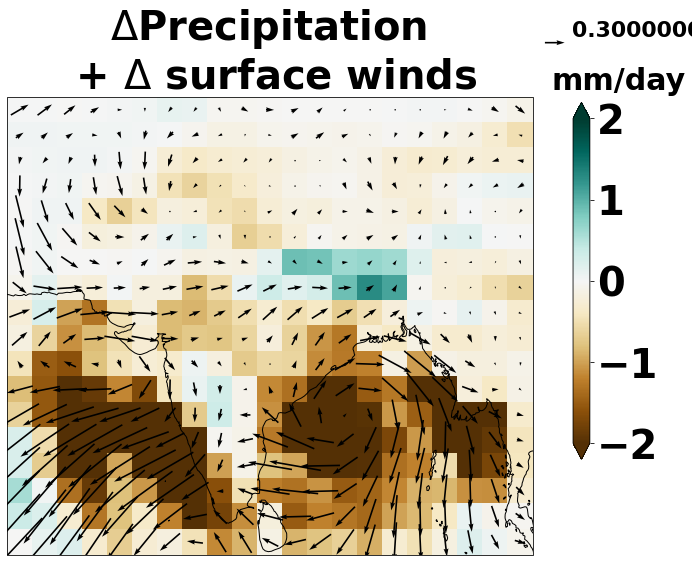

In [19]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})
ds_amip_pr = ds_amip.pr.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month')*86400
im = ds_amip_pr.plot(vmin=-2, vmax=2,cmap='BrBG', extend='both', ax=ax, add_colorbar=False)

# qk = ax.quiverkey(Q, 0.9, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure', color='r')
ds = ds_amip.uas.to_dataset(name = 'uas')
ds['vas'] = ds_amip.vas

ax.coastlines()
Q = ds.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month').plot.quiver('lon', 'lat', 'uas', 'vas', ax=ax, scale=8)
ax.set_title('$\Delta$Precipitation \n + $\Delta$ surface winds', fontsize=40, weight='bold')
cbar_ax = fig.add_axes([0.86, 0.2, 0.02, 0.6])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.tick_params(labelsize=40)
cb.set_label('mm/day', fontsize=30, weight='bold' , labelpad=-40, y=1.1, rotation=0)
#str_ = str(np.round(extract_pr_data_diff(2002, 1, 'pr').sel(lat=slice(30,25)).sel(lon=slice(72,85)).mean(dim='lat').mean(dim='lon').values,2))+' mm/day'
#ax.annotate(str_, xy=(72,23), fontsize=20, weight='bold')
fig.tight_layout()
plt.savefig('precipitation_jun_nov_amip.png')

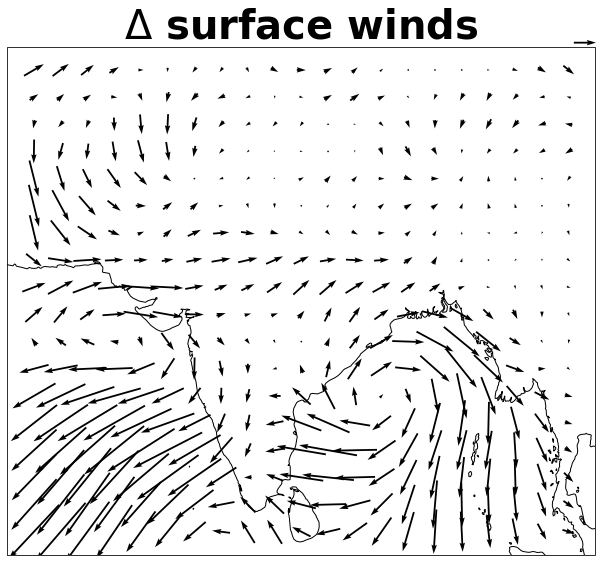

In [20]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})
ds_amip_pr = ds_amip.pr.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month')*86400
#im = ds_amip_pr.plot(vmin=-2, vmax=2,cmap='BrBG', extend='both', ax=ax, add_colorbar=False)

# qk = ax.quiverkey(Q, 0.9, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure', color='r')
ds = ds_amip.uas.to_dataset(name = 'uas')
ds['vas'] = ds_amip.vas

ax.coastlines()
Q = ds.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month').plot.quiver('lon', 'lat', 'uas', 'vas', ax=ax, scale=8)
ax.set_title('$\Delta$ surface winds', fontsize=40, weight='bold')
# cbar_ax = fig.add_axes([0.86, 0.2, 0.02, 0.6])
# cb = fig.colorbar(im, extend='both', cax=cbar_ax)
# cb.ax.tick_params(labelsize=40)
# cb.set_label('mm/day', fontsize=30, weight='bold' , labelpad=-40, y=1.1, rotation=0)
#str_ = str(np.round(extract_pr_data_diff(2002, 1, 'pr').sel(lat=slice(30,25)).sel(lon=slice(72,85)).mean(dim='lat').mean(dim='lon').values,2))+' mm/day'
#ax.annotate(str_, xy=(72,23), fontsize=20, weight='bold')
fig.tight_layout()
plt.savefig('winds_jun_nov_amip.png')

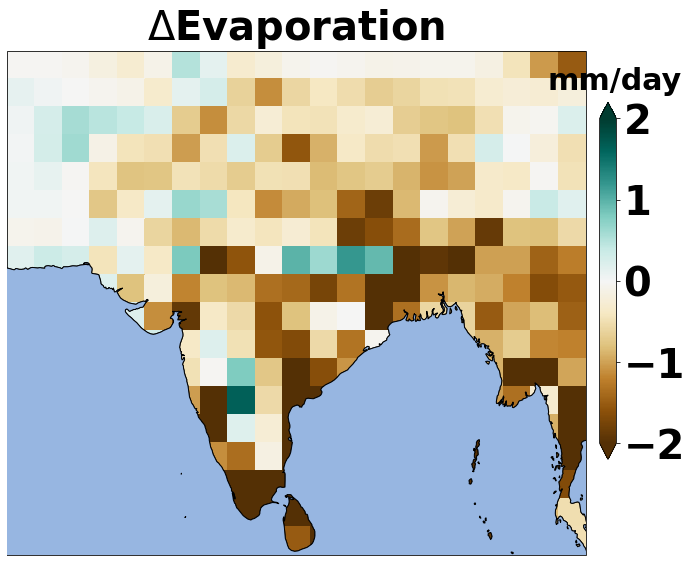

In [21]:
import cartopy as cart
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})
ds_amip_evspsbl = ds_amip.evspsbl.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month')*86400
ds_amip_evspsbl.plot(vmin=-0.25, vmax=0.25,cmap='BrBG', extend='both', add_colorbar=False)

ax.coastlines()
ax.set_title('')
ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
ax.set_title('$\Delta$Evaporation', fontsize=40, weight='bold')
cbar_ax = fig.add_axes([0.86, 0.2, 0.02, 0.6])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.tick_params(labelsize=40)
cb.set_label('mm/day', fontsize=30, weight='bold', labelpad=-70, y=1.1, rotation=0)
#cb.ax.set_yticklabels(labels=['{:.2f}'.format(x) for x in np.arange(-0.25,0.25+0.05,0.05)],fontsize=40, weight='bold')
fig.tight_layout()
plt.savefig('evaporation_jun_nov_amip.png')

In [22]:
clear_sky_shortwave_rf_surface = (ds_amip.rsdscs - ds_amip.rsuscs).sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month')

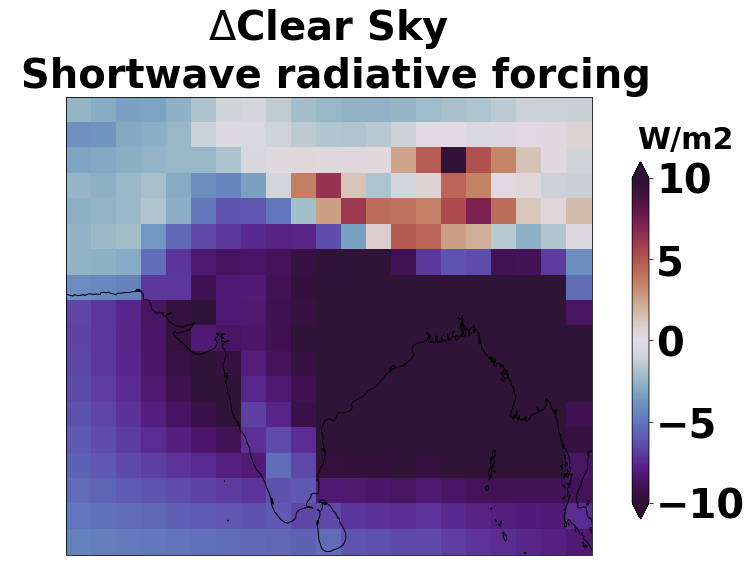

In [23]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})

im = clear_sky_shortwave_rf_surface.plot(vmin=-10.0, vmax=10.0,cmap='twilight_shifted', extend='both', add_colorbar=False)
ax.coastlines()
ax.set_title('')

ax.set_title('$\Delta$Clear Sky \n Shortwave radiative forcing', fontsize=40, weight='bold')
cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.tick_params(labelsize=40)
cb.set_label('W/m2', fontsize=30, weight='bold', labelpad=-60, y=1.1, rotation=0)
fig.tight_layout()
plt.savefig('clearsky_shortwave_radiative_forcing_at_surface_nov_amip.png', dpi=500)

In [24]:
olr = ds_amip.rlut.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month')

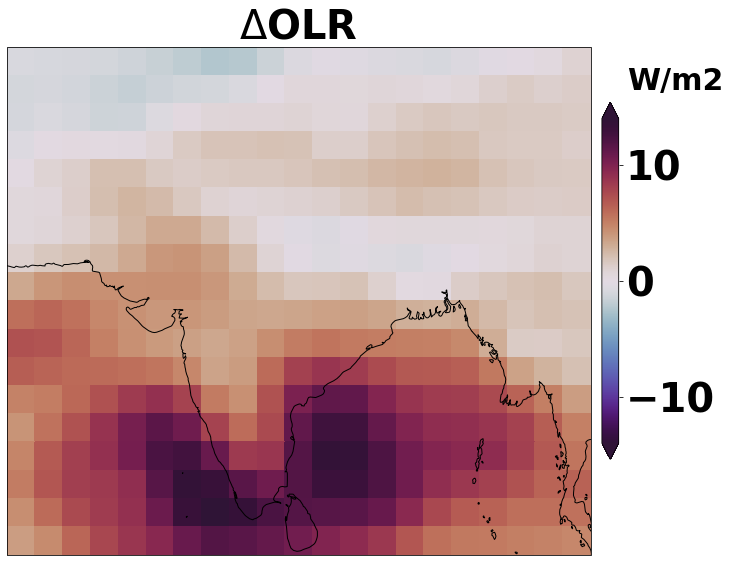

In [25]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})

im = olr.plot(ax=ax, cmap='twilight_shifted', add_colorbar=False)
ax.coastlines()
ax.set_title('')
ax.set_title('$\Delta$OLR', fontsize=40, weight='bold')
cbar_ax = fig.add_axes([0.86, 0.2, 0.02, 0.6])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.tick_params(labelsize=40)
cb.set_label('W/m2', fontsize=30, weight='bold', labelpad=-40, y=1.1, rotation=0)
fig.tight_layout()
plt.savefig('olr_amip.png', dpi=500)

In [26]:
soil_mois_amip = ds_amip.smsoil.sum(dim='lev4').sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month')

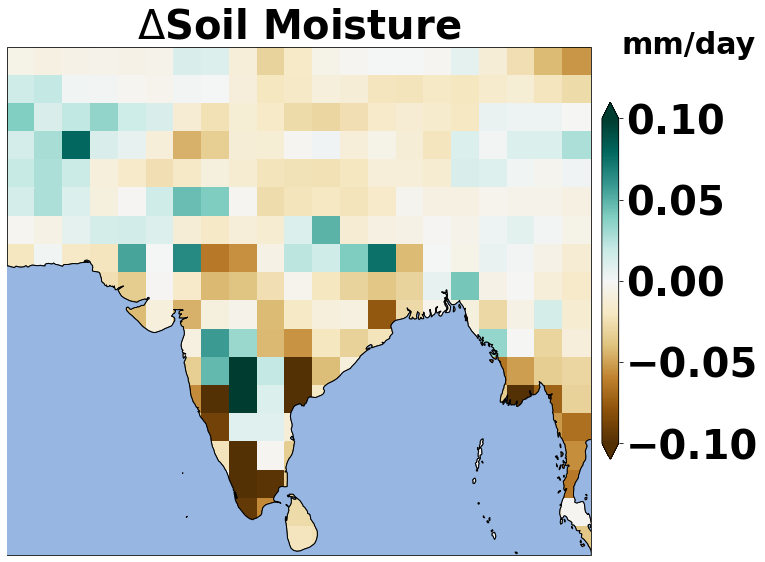

In [27]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})

im = soil_mois_amip.plot(cmap='BrBG', vmin=-0.1, vmax=0.1, add_colorbar=False)
ax.coastlines()
ax.set_title('')

ax.set_title('$\Delta$Soil Moisture', fontsize=40, weight='bold')
ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
cbar_ax = fig.add_axes([0.86, 0.2, 0.02, 0.6])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.tick_params(labelsize=40)
cb.set_label('mm/day', fontsize=30, weight='bold', labelpad=-70, y=1.2, rotation=0)
fig.tight_layout()
plt.savefig('soil_moisture_amip.png', dpi=500)

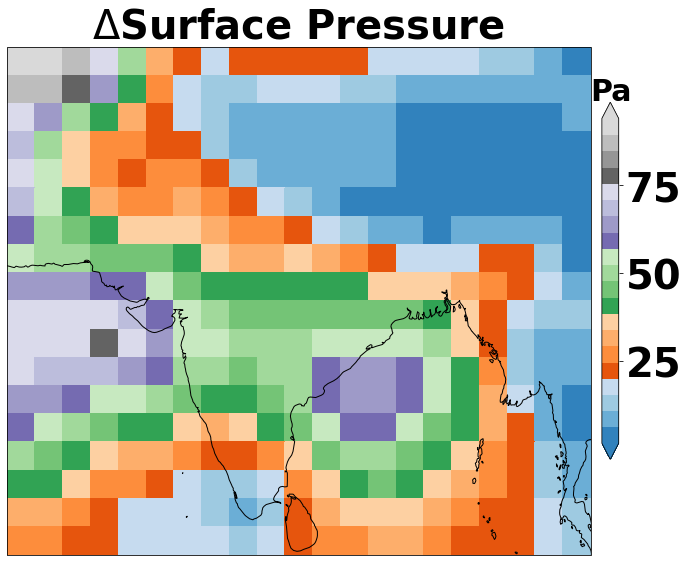

In [28]:
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,8.27), subplot_kw={'projection': ccrs.PlateCarree()})

im = ds_amip.ps.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month').plot(cmap='tab20c', add_colorbar=False)
ax.coastlines()
ax.set_title('')

ax.set_title('$\Delta$Surface Pressure', fontsize=40, weight='bold')
#ax.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
cbar_ax = fig.add_axes([0.86, 0.2, 0.02, 0.6])
cb = fig.colorbar(im, extend='both', cax=cbar_ax)
cb.ax.tick_params(labelsize=40)
cb.set_label('Pa', fontsize=30, weight='bold', labelpad=-70, y=1.07, rotation=0)
fig.tight_layout()
plt.savefig('surface_pressure.png', dpi=500)

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

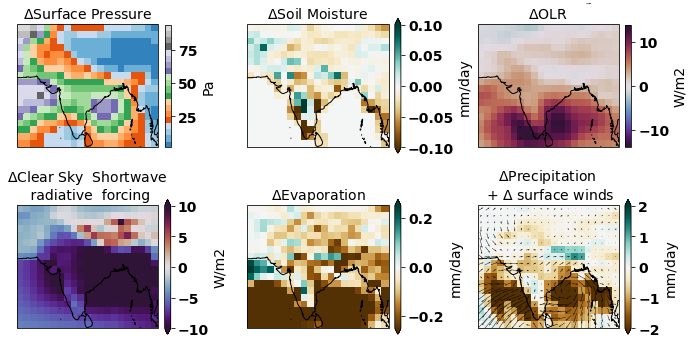

In [31]:
fig,ax = plt.subplots(ncols=3,nrows=2, figsize=(11,6), subplot_kw={'projection': ccrs.PlateCarree()})

f_ = 0.04
p_ = 0.04
im = ds_amip.ps.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month').plot(ax=ax[0,0],cmap='tab20c', cbar_kwargs={'label': 'Pa', \
                                                                                         'fraction': f_, \
                                                                                         'pad': p_})
im = soil_mois_amip.plot(cmap='BrBG', vmin=-0.1, vmax=0.1,ax=ax[0,1], cbar_kwargs={'label': 'mm/day', \
                                                                                         'fraction': f_, \
                                                                                         'pad': p_})
im = olr.plot(ax=ax[0,2], cmap='twilight_shifted', cbar_kwargs={'label': 'W/m2', \
                                                                                         'fraction': f_, \
                                                                                         'pad': p_})
im = clear_sky_shortwave_rf_surface.plot(ax=ax[1,0],vmin=-10.0, vmax=10.0,cmap='twilight_shifted', extend='both',  cbar_kwargs={'label': 'W/m2', \
                                                                                         'fraction': f_, \
                                                                                         'pad': p_})
ds_amip_evspsbl.plot(ax=ax[1,1],vmin=-0.25, vmax=0.25,cmap='BrBG', extend='both', cbar_kwargs={'label': 'mm/day', \
                                                                                         'fraction': f_, \
                                                                                         'pad': p_})

im = ds_amip_pr.plot(vmin=-2, vmax=2,cmap='BrBG', extend='both', ax=ax[1,2], cbar_kwargs={'label': 'mm/day', \
                                                                                         'fraction': f_, \
                                                                                         'pad': p_})

# qk = ax.quiverkey(Q, 0.9, 0.9, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure', color='r')
ds = ds_amip.uas.to_dataset(name = 'uas')
ds['vas'] = ds_amip.vas

Q = ds.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month').plot.quiver('lon', 'lat', 'uas', 'vas', ax=ax[1,2], scale=8)
tits_ = ['$\Delta$Surface Pressure', \
        '$\Delta$Soil Moisture', \
        '$\Delta$OLR', \
        '$\Delta$Clear Sky  Shortwave \n radiative  forcing', \
        '$\Delta$Evaporation', \
        '$\Delta$Precipitation \n + $\Delta$ surface winds']
cnt = 0
for i_ in range(2):
    for j_ in range(3):
        ax[i_,j_].coastlines()
        ax[i_,j_].set_title(tits_[cnt],fontsize=14)
        cnt = cnt + 1

left_  = 0.125  # the left side of the subplots of the figure
right_ = 0.9    # the right side of the subplots of the figure
bottom_ = 0.1   # the bottom of the subplots of the figure
top_ = 0.9      # the top of the subplots of the figure
wspace_ = 0.5   # the amount of width reserved for blank space between subplots
hspace_ = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left_, bottom=bottom_, right=right_, top=top_, wspace=wspace_, hspace=hspace_)
plt.savefig('physical_mechanism.png', dpi=500)

In [59]:
ds = ds_amip.uas.to_dataset(name = 'uas')
ds['vas'] = ds_amip.vas

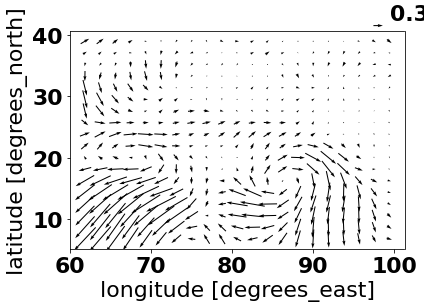

In [63]:
ds.sel(month=slice(6,11)).sel(lon=slice(60,100),lat=slice(40,5)).mean(dim='month').plot.quiver('lon', 'lat', 'uas', 'vas')

In [64]:
ds_amip.ua.lev64

<xarray.DataArray 'ua' (month: 12, lev64: 64, lat: 94, lon: 192)>
[13860864 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lev64    (lev64) float64 1.0 2.0 3.0 4.0 5.0 ... 60.0 61.0 62.0 63.0 64.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12